<a href="https://colab.research.google.com/github/dodevca/euro-2024-prediction/blob/main/Big_Data_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
nationalTeam = [
    "Germany", "Scotland", "Hungary", "Switzerland", "Spain", "Croatia", "Italy", "Albania", "Slovenia", "Denmark",
    "Serbia", "England", "Poland", "Netherlands", "Austria", "France", "Belgium", "Slovakia", "Romania",  "Ukraine",
    "Turkey", "Georgia", "Portugal", "Czech Republic"
]

In [ ]:
countryMapping = {
    'Turkey': 'Turkiye',
    'Czech Republic': 'Czechia'
}

def replaceCountryName(df, column_name, mapping):
    df[column_name] = df[column_name].replace(mapping)
    return df

In [ ]:
nationRank              = pd.read_csv('/content/fifa_ranking-2024-04-04.csv')

print(nationRank.head())

nationRank['rank_date'] = pd.to_datetime(nationRank['rank_date'])
nationRank              = nationRank[nationRank['rank_date'] == '2024-04-04']
nationRank              = replaceCountryName(nationRank, 'country_full', {v: k for k, v in countryMapping.items()})
nationRank              = nationRank[['country_full', 'rank']]
nationRank              = nationRank[(nationRank['country_full'].isin(nationalTeam))].sort_values(by=['rank'], ascending=True)

print(nationRank.head())

   rank country_full country_abrv  total_points  previous_points  rank_change  \
0  83.0    Guatemala          GUA          15.0              0.0           83   
1  32.0       Zambia          ZAM          38.0              0.0           32   
2  33.0     Portugal          POR          38.0              0.0           33   
3  34.0      Austria          AUT          38.0              0.0           34   
4  35.0     Colombia          COL          36.0              0.0           35   

  confederation   rank_date  
0      CONCACAF  1992-12-31  
1           CAF  1992-12-31  
2          UEFA  1992-12-31  
3          UEFA  1992-12-31  
4      CONMEBOL  1992-12-31  
      country_full  rank
67183       France   2.0
67184      Belgium   3.0
67154      England   4.0
67125     Portugal   6.0
67124  Netherlands   7.0


In [ ]:
nationResult          = pd.read_csv('/content/results.csv')

print(nationResult.head())

nationResult['date']  = pd.to_datetime(nationResult['date'])
nationResult          = nationResult[(nationResult['date'].dt.year >= 2022) & (nationResult['date'].dt.year <= 2024)]
nationResult          = replaceCountryName(nationResult, 'home_team', countryMapping)
nationResult          = replaceCountryName(nationResult, 'away_team', countryMapping)
nationResult          = nationResult[(nationResult['home_team'].isin(nationalTeam)) & (nationResult['away_team'].isin(nationalTeam))]

print(nationResult.head())

         date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England         0.0         0.0   Friendly  Glasgow   
1  1873-03-08   England  Scotland         4.0         2.0   Friendly   London   
2  1874-03-07  Scotland   England         2.0         1.0   Friendly  Glasgow   
3  1875-03-06   England  Scotland         2.0         2.0   Friendly   London   
4  1876-03-04  Scotland   England         3.0         0.0   Friendly  Glasgow   

    country  neutral  
0  Scotland    False  
1   England    False  
2  Scotland    False  
3   England    False  
4  Scotland    False  
            date    home_team    away_team  home_score  away_score tournament  \
44908 2022-03-24      Hungary       Serbia         0.0         1.0   Friendly   
44912 2022-03-24     Scotland       Poland         1.0         1.0   Friendly   
44945 2022-03-26      Croatia     Slovenia         1.0         1.0   Friendly   
44946 2022-03-26      England  Switzerland         

In [ ]:
nationPlayer = pd.read_csv('/content/euro2024_players.csv')

print(nationPlayer.head())

nationPlayer = replaceCountryName(nationPlayer, 'Country', {v: k for k, v in countryMapping.items()})

print(nationPlayer.head())

                    Name     Position  Age                 Club  Height  \
0  Marc-André ter Stegen   Goalkeeper   32         FC Barcelona     187   
1           Manuel Neuer   Goalkeeper   38        Bayern Munich     193   
2         Oliver Baumann   Goalkeeper   34  TSG 1899 Hoffenheim     187   
3     Nico Schlotterbeck  Centre-Back   24    Borussia Dortmund     191   
4           Jonathan Tah  Centre-Back   28  Bayer 04 Leverkusen     195   

    Foot  Caps  Goals  MarketValue  Country  
0  right    40      0     28000000  Germany  
1  right   119      0      4000000  Germany  
2  right     0      0      3000000  Germany  
3   left    12      0     40000000  Germany  
4  right    25      0     30000000  Germany  
                    Name     Position  Age                 Club  Height  \
0  Marc-André ter Stegen   Goalkeeper   32         FC Barcelona     187   
1           Manuel Neuer   Goalkeeper   38        Bayern Munich     193   
2         Oliver Baumann   Goalkeeper   34  TSG 

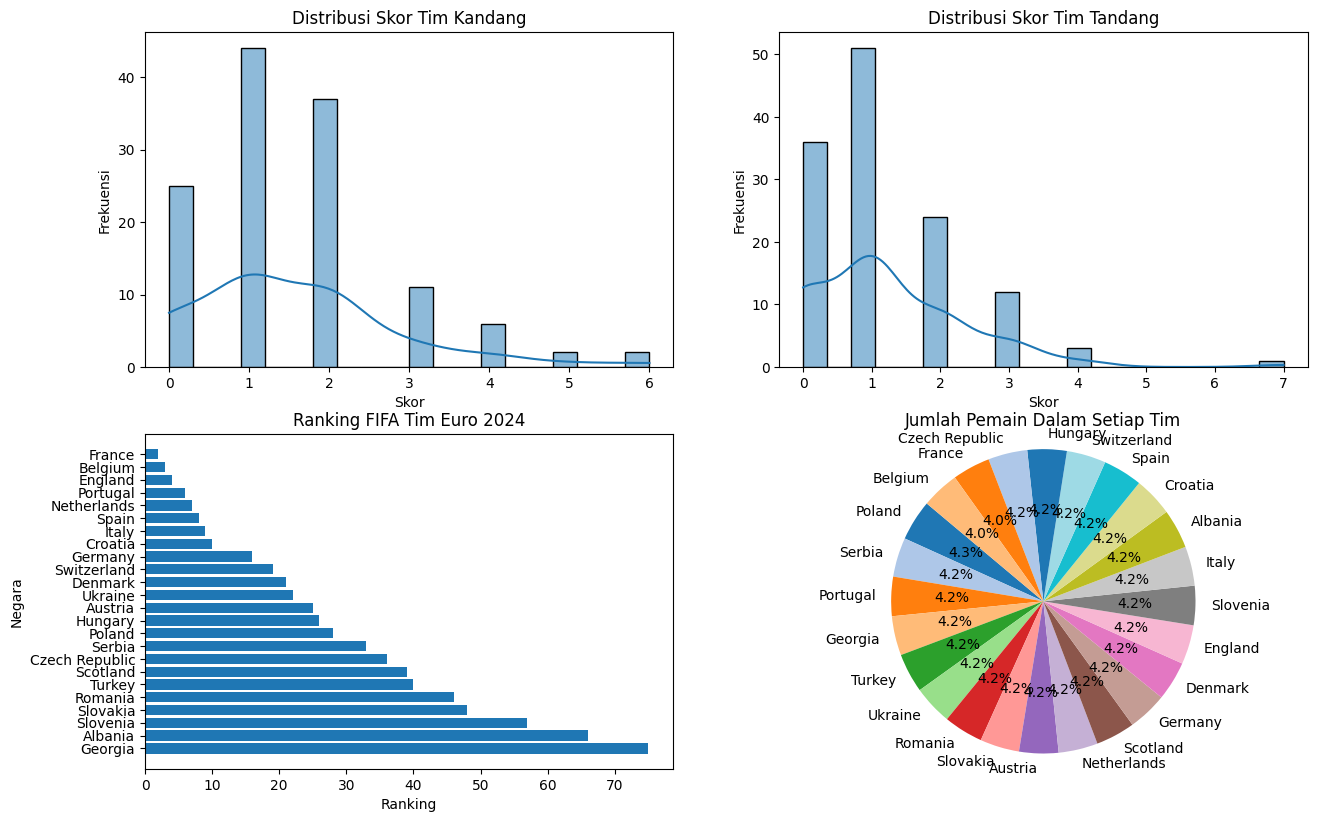

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.histplot(nationResult['home_score'], bins=20, kde=True)
plt.title('Distribusi Skor Tim Kandang')
plt.xlabel('Skor')
plt.ylabel('Frekuensi')

plt.subplot(4, 2, 2)
sns.histplot(nationResult['away_score'], bins=20, kde=True)
plt.title('Distribusi Skor Tim Tandang')
plt.xlabel('Skor')
plt.ylabel('Frekuensi')

plt.subplot(4, 2, 3)
plt.barh(nationRank['country_full'], nationRank['rank'])
plt.xlabel('Ranking')
plt.ylabel('Negara')
plt.title('Ranking FIFA Tim Euro 2024')
plt.gca().invert_yaxis()

plt.subplot(4, 2, 4)

nationCount = nationPlayer['Country'].value_counts()

plt.pie(nationCount, labels=nationCount.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.axis('equal')
plt.title('Jumlah Pemain Dalam Setiap Tim')
plt.show()

plt.tight_layout()
plt.show()

# **Analisis Korelasi**

- Menambahkan rata-rata gol dan kebobolan

In [ ]:
cols = ['home_team_ranking', 'away_team_ranking', 'home_score_avg', 'away_score_avg', 'home_concede_avg', 'away_concede_avg', 'home_avg_age', 'home_total_caps', 'home_total_market_value', 'away_avg_age', 'away_total_caps', 'away_total_market_value']

In [ ]:
nationResult['home_score_avg']    = nationResult.groupby('home_team')['home_score'].transform(lambda x: x.rolling(10, min_periods=1).mean())
nationResult['away_score_avg']    = nationResult.groupby('away_team')['away_score'].transform(lambda x: x.rolling(10, min_periods=1).mean())
nationResult['home_concede_avg']  = nationResult.groupby('home_team')['away_score'].transform(lambda x: x.rolling(10, min_periods=1).mean())
nationResult['away_concede_avg']  = nationResult.groupby('away_team')['home_score'].transform(lambda x: x.rolling(10, min_periods=1).mean())
nationResult                      = nationResult.dropna()

nationResult.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_score_avg,away_score_avg,home_concede_avg,away_concede_avg
44908,2022-03-24,Hungary,Serbia,0.0,1.0,Friendly,Budapest,Hungary,False,0.0,1.0,1.0,0.0
44912,2022-03-24,Scotland,Poland,1.0,1.0,Friendly,Glasgow,Scotland,False,1.0,1.0,1.0,1.0
44945,2022-03-26,Croatia,Slovenia,1.0,1.0,Friendly,Al Rayyan,Qatar,True,1.0,1.0,1.0,1.0
44946,2022-03-26,England,Switzerland,2.0,1.0,Friendly,London,England,False,2.0,1.0,1.0,2.0
44952,2022-03-26,Netherlands,Denmark,4.0,2.0,Friendly,Amsterdam,Netherlands,False,4.0,2.0,2.0,4.0


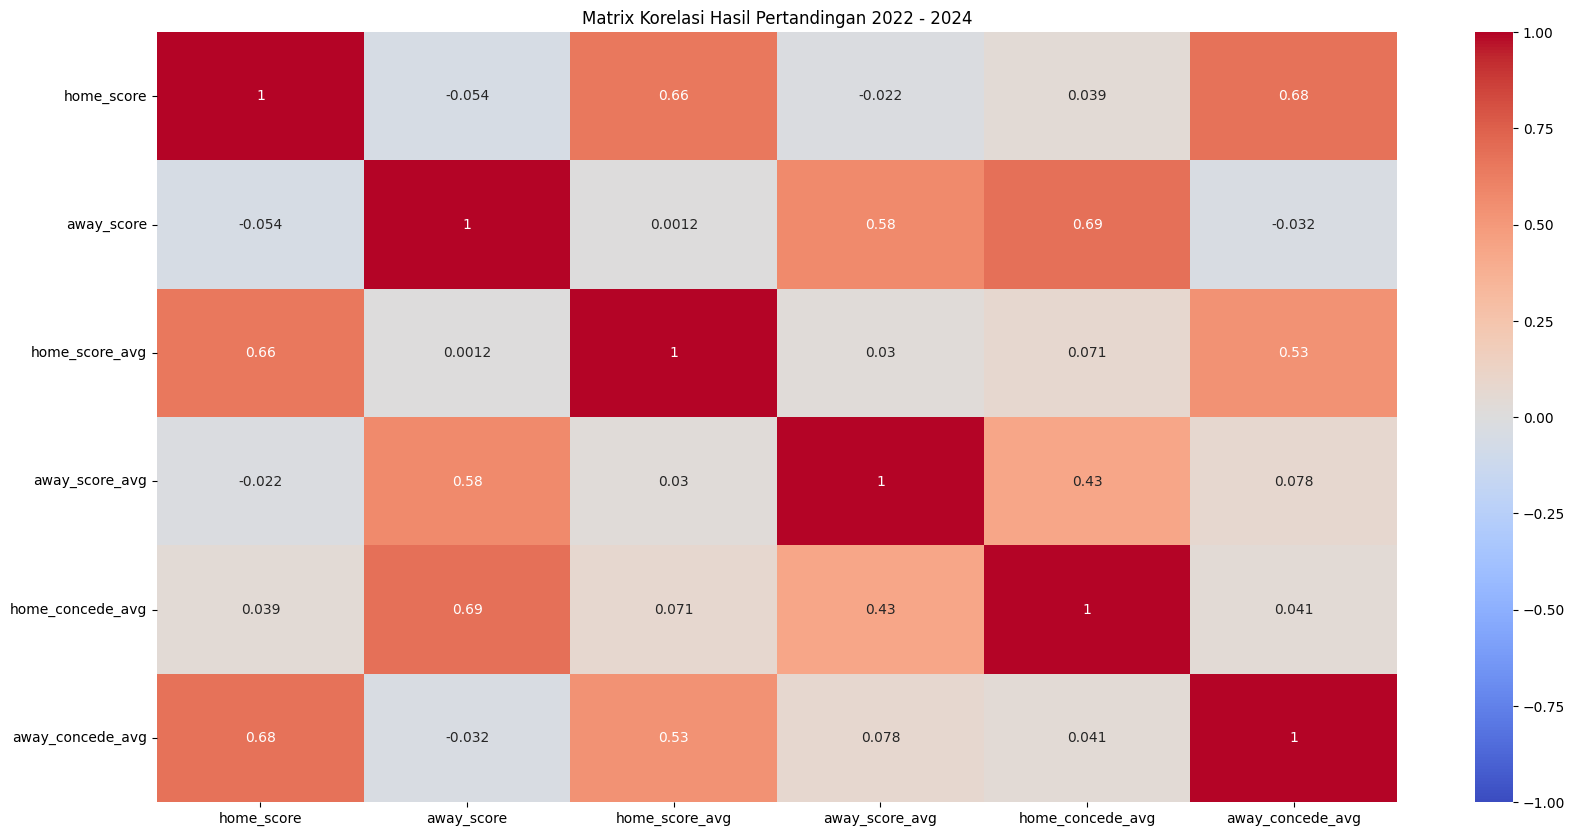

In [ ]:
correlationMatrix = nationResult[['home_score', 'away_score', 'home_score_avg', 'away_score_avg', 'home_concede_avg', 'away_concede_avg']].corr()

plt.figure(figsize=(20, 10))

sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

plt.title('Matrix Korelasi Hasil Pertandingan 2022 - 2024')
plt.show()

- Menggabungkan ranking tim dengan hasil pertandingan

In [ ]:
nationResult = nationResult.merge(nationRank, left_on='home_team', right_on='country_full', how='left')
nationResult = nationResult.rename(columns={'rank': 'home_team_ranking'}).drop(columns=['country_full'])
nationResult = nationResult.merge(nationRank, left_on='away_team', right_on='country_full', how='left')
nationResult = nationResult.rename(columns={'rank': 'away_team_ranking'}).drop(columns=['country_full'])
nationResult = nationResult.dropna()

nationResult.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_score_avg,away_score_avg,home_concede_avg,away_concede_avg,home_team_ranking,away_team_ranking
0,2022-03-24,Hungary,Serbia,0.0,1.0,Friendly,Budapest,Hungary,False,0.0,1.0,1.0,0.0,26.0,33.0
1,2022-03-24,Scotland,Poland,1.0,1.0,Friendly,Glasgow,Scotland,False,1.0,1.0,1.0,1.0,39.0,28.0
2,2022-03-26,Croatia,Slovenia,1.0,1.0,Friendly,Al Rayyan,Qatar,True,1.0,1.0,1.0,1.0,10.0,57.0
3,2022-03-26,England,Switzerland,2.0,1.0,Friendly,London,England,False,2.0,1.0,1.0,2.0,4.0,19.0
4,2022-03-26,Netherlands,Denmark,4.0,2.0,Friendly,Amsterdam,Netherlands,False,4.0,2.0,2.0,4.0,7.0,21.0


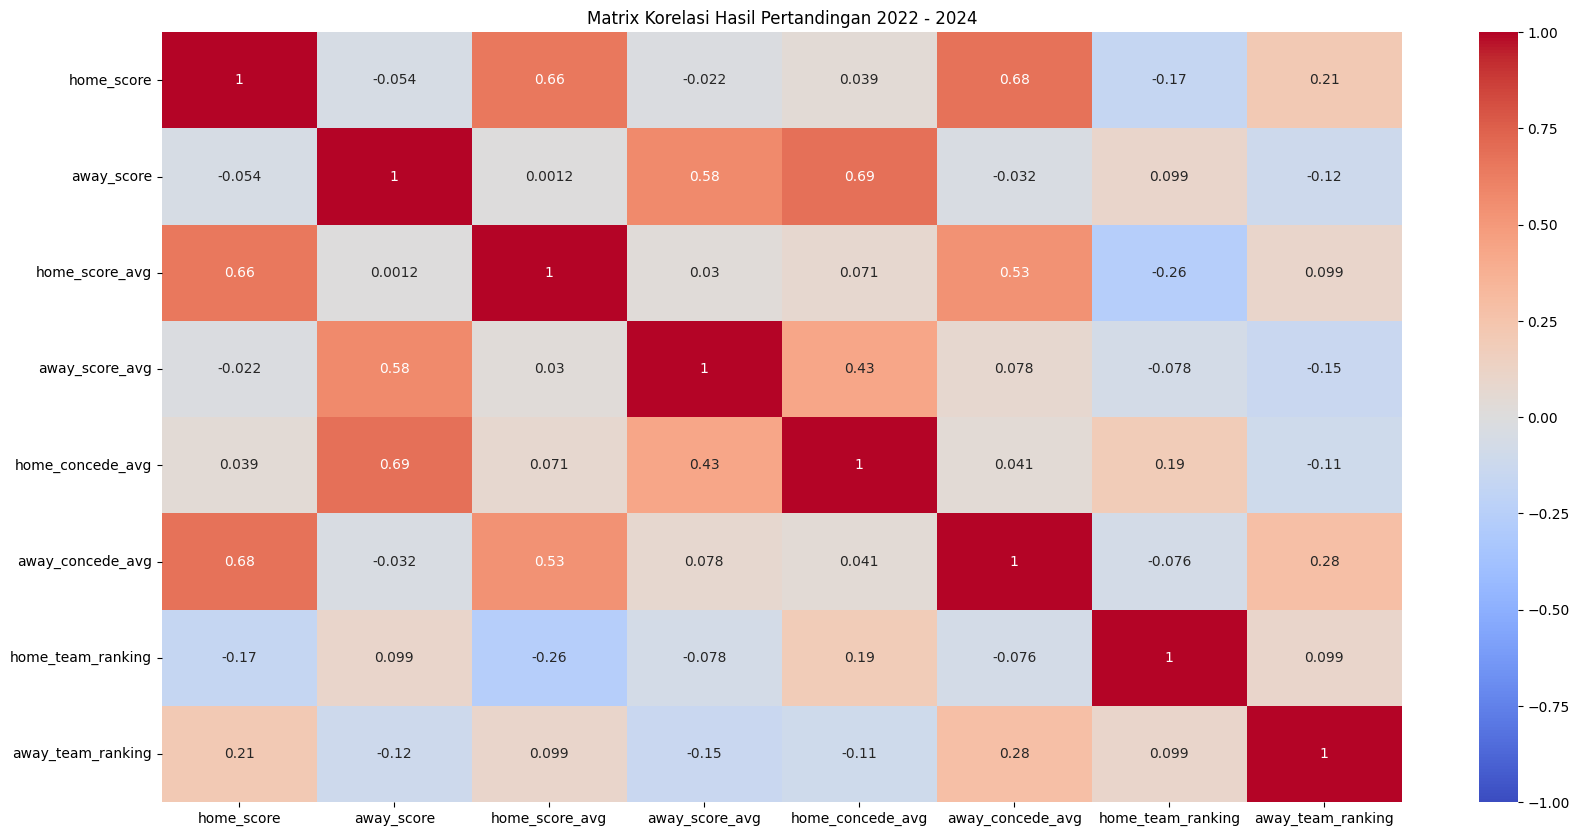

In [ ]:
correlationMatrix = nationResult[['home_score', 'away_score', 'home_score_avg', 'away_score_avg', 'home_concede_avg', 'away_concede_avg', 'home_team_ranking', 'away_team_ranking']].corr()

plt.figure(figsize=(20, 10))

sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

plt.title('Matrix Korelasi Hasil Pertandingan 2022 - 2024')
plt.show()

- Menggabungkan hasil pertandingan dan ranking dengan statistik pemain


In [ ]:
nationPlayer = nationPlayer.groupby('Country').agg({
    'Age': 'mean',
    'Caps': 'sum',
    'MarketValue': 'sum'
}).reset_index()
nationPlayer = nationPlayer.rename(columns={
    'Country': 'team',
    'Age': 'avg_age',
    'Caps': 'total_caps',
    'MarketValue': 'total_market_value'
})

nationResult = nationResult.merge(nationPlayer, left_on='home_team', right_on='team', how='left').drop(columns=['team'])
nationResult = nationResult.rename(columns={
    'avg_age': 'home_avg_age',
    'total_caps': 'home_total_caps',
    'total_market_value': 'home_total_market_value'
})
nationResult = nationResult.merge(nationPlayer, left_on='away_team', right_on='team', how='left').drop(columns=['team'])
nationResult = nationResult.rename(columns={
    'avg_age': 'away_avg_age',
    'total_caps': 'away_total_caps',
    'total_market_value': 'away_total_market_value'
})

nationResult = nationResult.dropna()

nationResult.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_score_avg,...,home_concede_avg,away_concede_avg,home_team_ranking,away_team_ranking,home_avg_age,home_total_caps,home_total_market_value,away_avg_age,away_total_caps,away_total_market_value
0,2022-03-24,Hungary,Serbia,0.0,1.0,Friendly,Budapest,Hungary,False,0.0,...,1.0,0.0,26.0,33.0,27.423077,750,164450000,27.384615,860,311800000
1,2022-03-24,Scotland,Poland,1.0,1.0,Friendly,Glasgow,Scotland,False,1.0,...,1.0,1.0,39.0,28.0,28.230769,643,207400000,27.555556,825,212400000
2,2022-03-26,Croatia,Slovenia,1.0,1.0,Friendly,Al Rayyan,Qatar,True,1.0,...,1.0,1.0,10.0,57.0,27.692308,1152,327700000,27.346154,771,139500000
3,2022-03-26,England,Switzerland,2.0,1.0,Friendly,London,England,False,2.0,...,1.0,2.0,4.0,19.0,26.076923,651,1515000000,27.692308,1092,282000000
4,2022-03-26,Netherlands,Denmark,4.0,2.0,Friendly,Amsterdam,Netherlands,False,4.0,...,2.0,4.0,7.0,21.0,26.538462,838,845000000,27.692308,1071,415500000


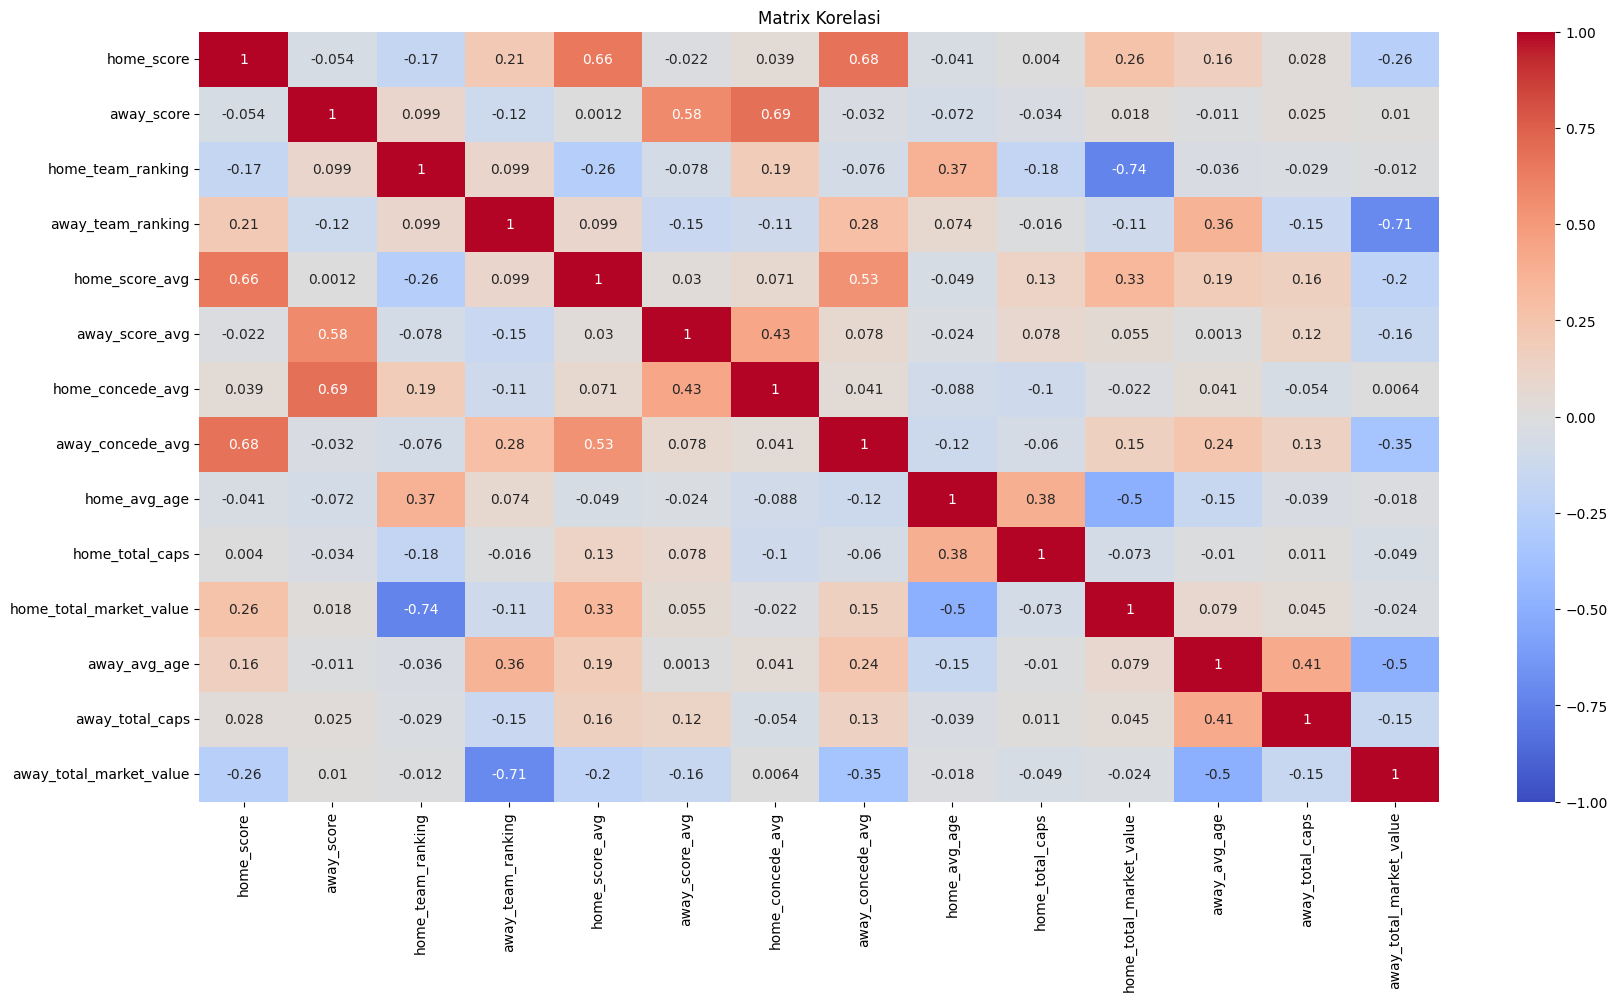

In [ ]:
correlationMatrix = nationResult[['home_score', 'away_score', 'home_team_ranking', 'away_team_ranking', 'home_score_avg', 'away_score_avg', 'home_concede_avg',
                                  'away_concede_avg', 'home_avg_age', 'home_total_caps', 'home_total_market_value', 'away_avg_age', 'away_total_caps',
                                  'away_total_market_value']].corr()

plt.figure(figsize=(20, 10))

sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

plt.title('Matrix Korelasi')
plt.show()

# **Model Regresi Linear**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error

In [ ]:
x       = nationResult[['home_team_ranking', 'away_team_ranking', 'home_score_avg', 'away_score_avg', 'home_concede_avg', 'away_concede_avg', 'home_avg_age',
                        'home_total_caps', 'home_total_market_value', 'away_avg_age', 'away_total_caps', 'away_total_market_value']]
y_home  = nationResult['home_score']
y_away  = nationResult['away_score']

In [ ]:
X_scaled        = pd.DataFrame(data = x)
X_scaled[cols]  = StandardScaler().fit_transform(x[cols])

X_scaled.head()

,home_team_ranking,away_team_ranking,home_score_avg,away_score_avg,home_concede_avg,away_concede_avg,home_avg_age,home_total_caps,home_total_market_value,away_avg_age,away_total_caps,away_total_market_value
0,0.312132,0.655553,-1.792332,-0.356384,-0.369708,-1.866997,0.408167,-0.294381,-1.007701,0.362900,0.216756,-0.603633
1,1.062247,0.372949,-0.590099,-0.356384,-0.369708,-0.583793,1.782825,-0.867579,-0.905880,0.645692,0.029454,-0.848917
2,-0.611087,2.012053,-0.590099,-0.356384,-0.369708,-0.583793,0.866387,1.859128,-0.620688,0.299272,-0.259525,-1.028808
3,-0.957294,-0.135739,0.612135,-0.356384,-0.369708,0.699411,-1.882929,-0.824723,2.194018,0.871925,1.458298,-0.677169
4,-0.784191,-0.022697,3.016601,1.287563,0.848417,3.265819,-1.097410,0.177034,0.605664,0.871925,1.345917,-0.347738


In [ ]:
X_train, X_test, y_home_train, y_home_test = train_test_split(X_scaled, y_home, test_size=0.3, random_state=50)
X_train, X_test, y_away_train, y_away_test = train_test_split(X_scaled, y_away, test_size=0.3, random_state=50)

In [ ]:
print('Train set:', X_train.shape,  y_home_train.shape)
print(X_train.head())
print('\n')
print('Test set:', X_test.shape,  y_home_test.shape)
print(X_test.head())

Train set: (88, 12) (88,)
     home_team_ranking  away_team_ranking  home_score_avg  away_score_avg  \
53            0.254430          -0.700947       -0.109205        0.301195   
57            0.716040          -0.135739        1.814368        0.465590   
116           0.716040          -0.983552        0.311576       -0.121534   
120          -1.014996           1.503365        0.371688        0.465590   
14           -1.014996          -0.813989       -0.590099        4.575457   

     home_concede_avg  away_concede_avg  home_avg_age  home_total_caps  \
53           0.361167          0.186130     -0.639191        -1.028289   
57           0.848417          1.020212      0.342707         0.294888   
116          0.543886         -0.767108      0.342707         0.294888   
120          0.117542          0.057809     -0.516126         0.771660   
14           3.284667         -0.583793     -0.516126         0.771660   

     home_total_market_value  away_avg_age  away_total_caps  \
53 

In [ ]:
print('Train set:', X_train.shape,  y_away_train.shape)
print(X_train.head())
print('\n')
print('Test set:', X_test.shape,  y_away_test.shape)
print(X_test.head())

Train set: (88, 12) (88,)
     home_team_ranking  away_team_ranking  home_score_avg  away_score_avg  \
53            0.254430          -0.700947       -0.109205        0.301195   
57            0.716040          -0.135739        1.814368        0.465590   
116           0.716040          -0.983552        0.311576       -0.121534   
120          -1.014996           1.503365        0.371688        0.465590   
14           -1.014996          -0.813989       -0.590099        4.575457   

     home_concede_avg  away_concede_avg  home_avg_age  home_total_caps  \
53           0.361167          0.186130     -0.639191        -1.028289   
57           0.848417          1.020212      0.342707         0.294888   
116          0.543886         -0.767108      0.342707         0.294888   
120          0.117542          0.057809     -0.516126         0.771660   
14           3.284667         -0.583793     -0.516126         0.771660   

     home_total_market_value  away_avg_age  away_total_caps  \
53 

In [ ]:
model_home = LinearRegression()
model_away = LinearRegression()

model_home.fit(X_train, y_home_train)
model_away.fit(X_train, y_away_train)

print(model_home.coef_)
print(model_away.coef_)
print(model_home.intercept_)
print(model_away.intercept_)

[ 0.00186871 -0.03975564  0.40388177 -0.14069891  0.04580876  0.6028728
  0.23632906 -0.11213909  0.23379624 -0.02149806 -0.10935119 -0.03081444]
[ 0.03687865  0.09197092 -0.11208241  0.3199206   0.68013573 -0.03472716
 -0.07777869  0.07754637  0.10925232 -0.02874144  0.09027042  0.06761302]
1.5513538829841071
1.230500128183391


In [ ]:
y_home_pred = model_home.predict(X_test)
y_away_pred = model_away.predict(X_test)

print(y_home_pred)
print(y_away_pred)

[ 0.09972761  0.73230088 -0.42902568  2.0023097   1.30900934  0.85358903
  0.96729981  1.09691937  1.67210294  1.22476599  2.1496095   2.26015555
 -0.36142524  2.15878893  1.51849188  3.39331335  1.89884035  1.60948794
  0.3703768   2.32161067  3.88799097  1.70107167  1.31802116  3.48036303
  0.95440255  1.34923869  1.61659623  0.58402257  1.81076725  1.53908672
  1.21909378  0.02561073  0.95287962  1.9910725   2.5657301   0.79291303
  2.47632619  1.37662035  1.53188727]
[ 2.05238315  2.53715912  2.81258277  1.06234146  1.23412146  0.95031605
  0.89033639  0.5303469   0.70484853  1.23461892  1.72789936  1.10734244
  2.46375053  0.84768782  1.34903914  0.77712972  1.91155021  1.0803922
  0.79476863 -0.40424047 -0.33836924  0.86143974  1.77285123  0.51450604
  1.38025661  0.30075952  0.99940567  0.61295282  1.43999775  1.90730542
  2.00070855  0.23261499 -0.03468656  0.3216966   1.30780892  0.19443195
  1.73882181  1.07373211  1.32290799]


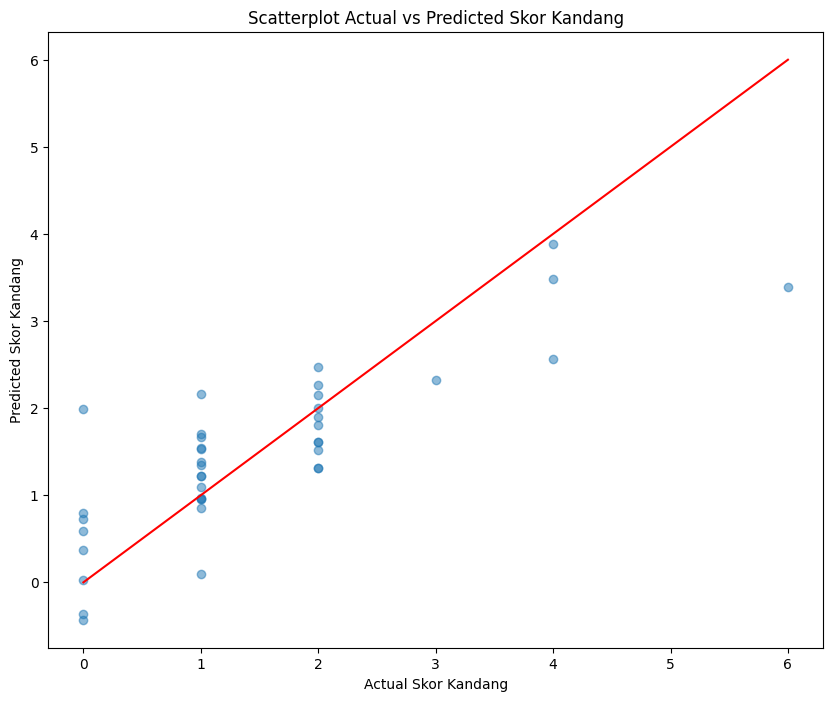

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(y_home_test, y_home_pred, alpha=0.5)
plt.plot([min(y_home_test), max(y_home_test)], [min(y_home_test), max(y_home_test)], color='red')
plt.xlabel('Actual Skor Kandang')
plt.ylabel('Predicted Skor Kandang')
plt.title('Scatterplot Actual vs Predicted Skor Kandang')
plt.show()

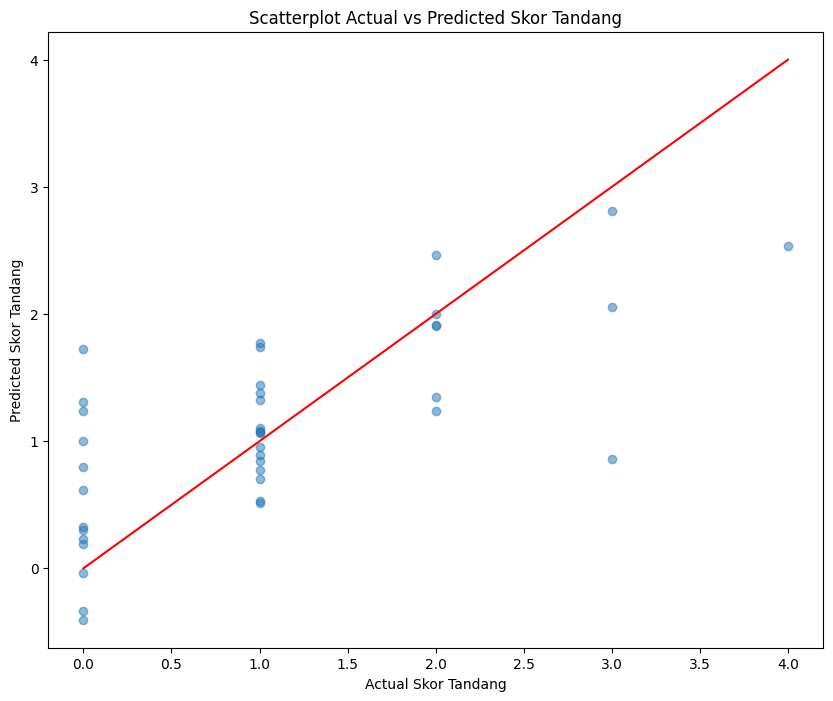

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(y_away_test, y_away_pred, alpha=0.5)
plt.plot([min(y_away_test), max(y_away_test)], [min(y_away_test), max(y_away_test)], color='red')
plt.xlabel('Actual Skor Tandang')
plt.ylabel('Predicted Skor Tandang')
plt.title('Scatterplot Actual vs Predicted Skor Tandang')
plt.show()

# **Evaluasi Model Linear**

In [ ]:
mse_home  = mean_squared_error(y_home_test, y_home_pred)
mse_away  = mean_squared_error(y_away_test, y_away_pred)
mae_home  = mean_absolute_error(y_home_test, y_home_pred)
mae_away  = mean_absolute_error(y_away_test, y_away_pred)
r2_home   = r2_score(y_home_test, y_home_pred)
r2_away   = r2_score(y_away_test, y_away_pred)

print(f"Evaluasi Model Tim Kandang")
print(f"MSE: {mse_home}, R2: {r2_home}, MAE: {mae_home}")
print(f"Evaluasi Model Tim Tandang")
print(f"MSE: {mse_away}, R2: {r2_away}, MAE: {mae_away}")

Evaluasi Model Tim Kandang
MSE: 0.5493114065056544, R2: 0.6741409324122074, MAE: 0.5252975185267664
Evaluasi Model Tim Tandang
MSE: 0.5108044191794676, R2: 0.5006853974473202, MAE: 0.5145027936164245
